<a href="https://colab.research.google.com/github/Hjhirp/Digital-Image-Processing-and-Analysis/blob/main/Lab10/DIPA_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Signature

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import skimage.io
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image as im

### Rectangle

(460, 819)


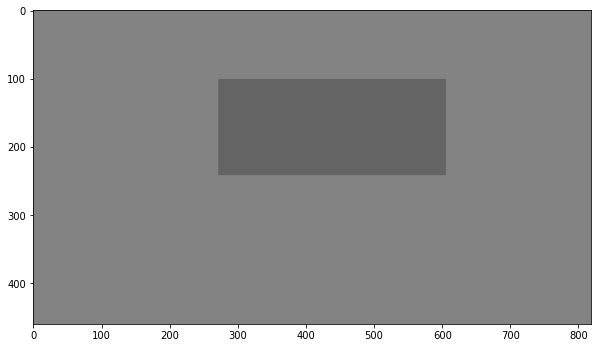

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DIPA/rect.png")
img_arr = np.average(img,axis=-1)
print(img_arr.shape)
data = im.fromarray(img_arr)
plt.figure(figsize=(10,10))
plt.imshow(data)
plt.show()

In [ ]:
image.shape

(460, 819, 3)

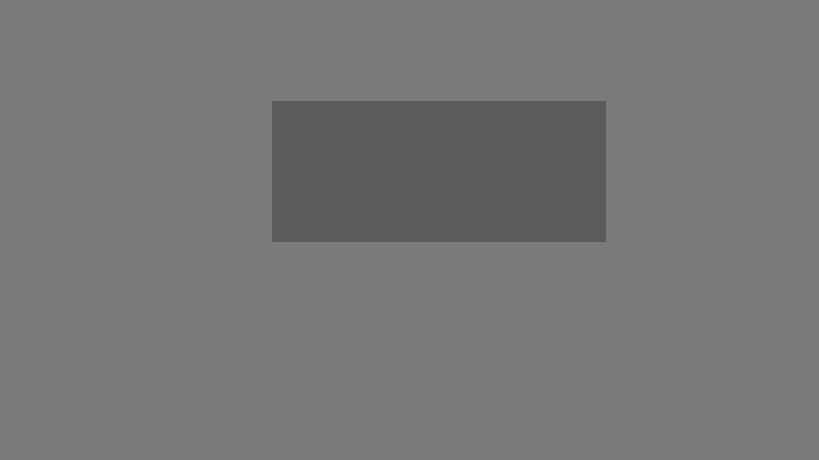

In [ ]:
img1_ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img1_)



In [ ]:
def convolve(mask,image,s):
  out = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      s1=0
      if(i-s//2 >=0 and j-s//2>=0 and i+s//2<image.shape[0] and j+s//2<image.shape[1]):
        i2=0
        for i1 in range(i-s//2,i+s//2+1):
          j2=0
          for j1 in range(j-s//2,j+s//2+1):
            s1+=image[i1][j1]*mask[i2][j2]
            # print(image[i1][j1],mask[i2][j2])
            j2+=1
          i2+=1
        out[i][j] = s1

  return out

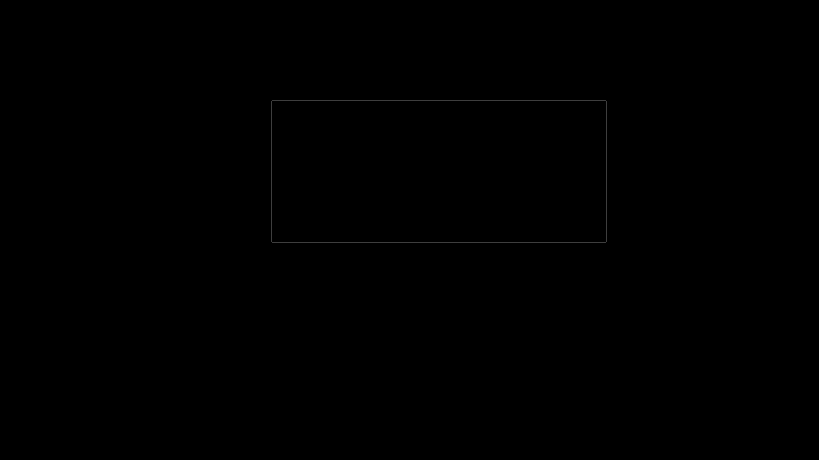

In [ ]:
mask = [[0,-2,0],[-2,8,-2],[0,-2,0]]
edges = convolve(mask,img1_,3)
cv2_imshow(edges)

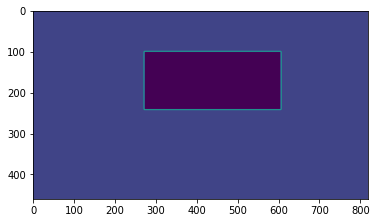

In [ ]:
ret, thresh = cv2.threshold(edges, 60, 255, cv2.THRESH_BINARY)
thresh = thresh.astype(np.uint8)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy = img1_.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255), thickness=0, lineType=cv2.LINE_AA)
plt.imshow(image_copy)

In [ ]:
z=0
boundary_points = []
for i in contours:
    for j in i:
        boundary_points.append(j[0])
points = np.array(boundary_points)
for i in points:
    print(i)

[272 100]
[271 101]
[271 102]
[271 103]
[271 104]
[271 105]
[271 106]
[271 107]
[271 108]
[271 109]
[271 110]
[271 111]
[271 112]
[271 113]
[271 114]
[271 115]
[271 116]
[271 117]
[271 118]
[271 119]
[271 120]
[271 121]
[271 122]
[271 123]
[271 124]
[271 125]
[271 126]
[271 127]
[271 128]
[271 129]
[271 130]
[271 131]
[271 132]
[271 133]
[271 134]
[271 135]
[271 136]
[271 137]
[271 138]
[271 139]
[271 140]
[271 141]
[271 142]
[271 143]
[271 144]
[271 145]
[271 146]
[271 147]
[271 148]
[271 149]
[271 150]
[271 151]
[271 152]
[271 153]
[271 154]
[271 155]
[271 156]
[271 157]
[271 158]
[271 159]
[271 160]
[271 161]
[271 162]
[271 163]
[271 164]
[271 165]
[271 166]
[271 167]
[271 168]
[271 169]
[271 170]
[271 171]
[271 172]
[271 173]
[271 174]
[271 175]
[271 176]
[271 177]
[271 178]
[271 179]
[271 180]
[271 181]
[271 182]
[271 183]
[271 184]
[271 185]
[271 186]
[271 187]
[271 188]
[271 189]
[271 190]
[271 191]
[271 192]
[271 193]
[271 194]
[271 195]
[271 196]
[271 197]
[271 198]
[271 199]


In [ ]:
M = cv2.moments(thresh)
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX)
print(cY)

438
171


In [ ]:
import math
y = []
x = []
p=0
for i in points:
    dist = math.sqrt(pow(cX-i[0],2) + pow(cY-i[1],2))
    y.append(dist)
    x.append(p)
    p+=1

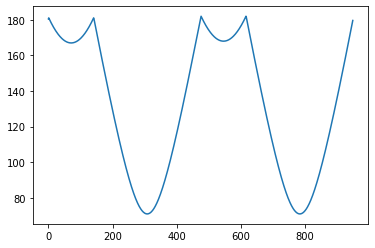

In [ ]:
plt.plot(x,y)
plt.show()

### Circle

(1024, 1024)


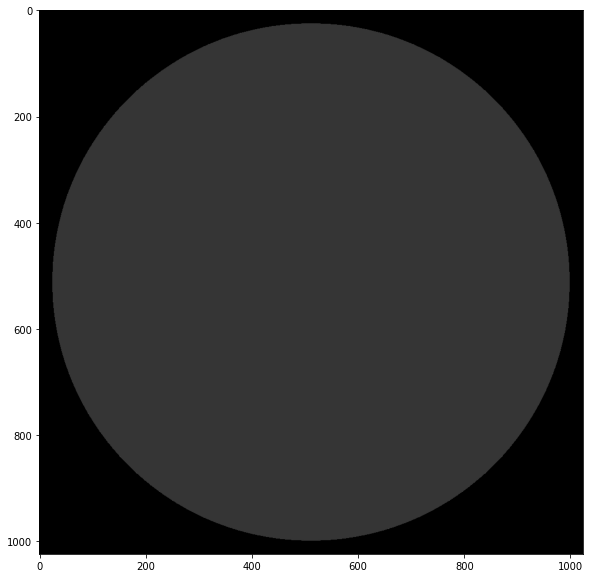

In [ ]:
image = cv2.imread("/content/drive/MyDrive/DIPA/circle_PNG52.png")
img_arr = np.average(image,axis=-1)
print(img_arr.shape)
data = im.fromarray(img_arr)
plt.figure(figsize=(10,10))
plt.imshow(data)
plt.show()

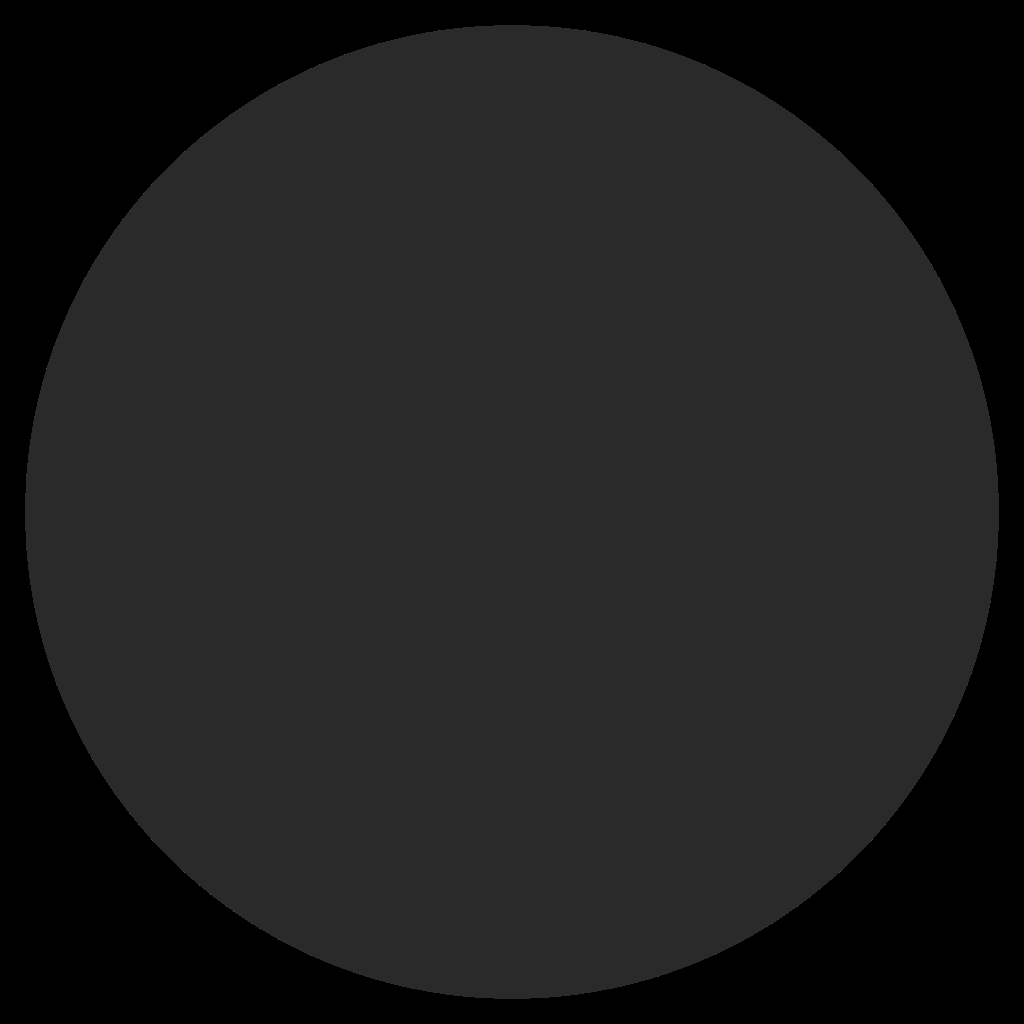

In [ ]:
img1_ = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(img1_)

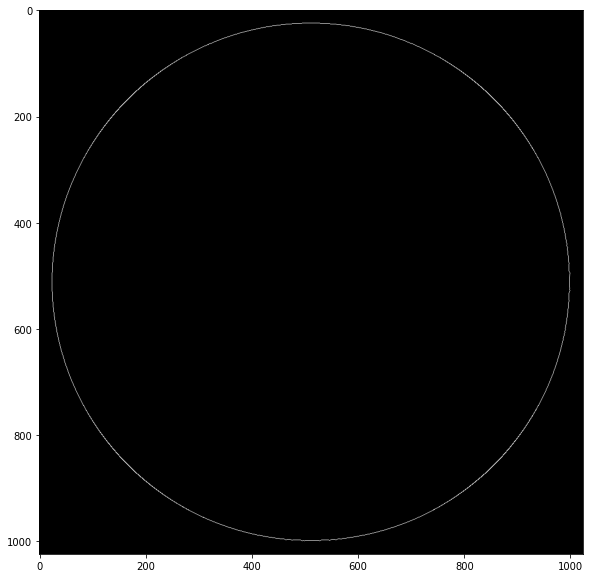

In [ ]:
t_lower = 20
t_upper = 200

edge1 = cv2.Canny(img1_, t_lower, t_upper)
edge_arr1 = np.asarray(edge1)
data_2 = im.fromarray(edge_arr1)
plt.figure(figsize=(10,10))
plt.imshow(data_2,cmap="gray")
plt.show()

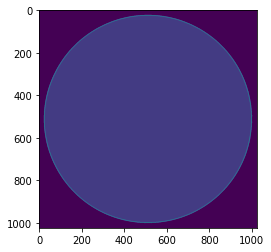

In [ ]:
ret, thresh = cv2.threshold(edge_arr1, 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
image_copy = img1_.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255), thickness=0, lineType=cv2.LINE_AA)
plt.imshow(image_copy)

In [ ]:
z=0
boundary_points = []
for i in contours:
    for j in i:
        boundary_points.append(j[0])
points = np.array(boundary_points)
for i in points:
    print(i)

[495  24]
[494  25]
[493  25]
[492  25]
[491  25]
[490  25]
[489  25]
[488  25]
[487  25]
[486  25]
[485  25]
[484  25]
[483  25]
[482  25]
[481  25]
[480  25]
[479  25]
[478  25]
[477  25]
[476  25]
[475  26]
[474  26]
[473  26]
[472  26]
[471  26]
[470  26]
[469  26]
[468  26]
[467  26]
[466  26]
[465  26]
[464  26]
[463  27]
[462  27]
[461  27]
[460  27]
[459  27]
[458  27]
[457  27]
[456  27]
[455  27]
[454  28]
[453  28]
[452  28]
[451  28]
[450  28]
[449  28]
[448  28]
[447  28]
[446  29]
[445  29]
[444  29]
[443  29]
[442  29]
[441  29]
[440  29]
[439  29]
[438  30]
[437  30]
[436  30]
[435  30]
[434  30]
[433  31]
[432  31]
[431  31]
[430  31]
[429  31]
[428  31]
[427  31]
[426  32]
[425  32]
[424  32]
[423  32]
[422  32]
[421  33]
[420  33]
[419  33]
[418  33]
[417  33]
[416  34]
[415  34]
[414  34]
[413  34]
[412  34]
[411  35]
[410  35]
[409  35]
[408  35]
[407  36]
[406  36]
[405  36]
[404  36]
[403  36]
[402  37]
[401  37]
[400  37]
[399  37]
[398  38]
[397  38]
[396  38]


In [ ]:
M = cv2.moments(thresh)
# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
print(cX)
print(cY)

511
511


In [ ]:
import math
y1 = []
x1 = []
p1=0
for i in points:
    dist = math.sqrt(pow(cX-i[0],2) + pow(cY-i[1],2))
    y1.append(dist)
    x1.append(p1)
    p1+=1

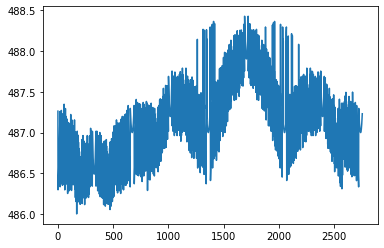

In [ ]:
plt.plot(x1,y1)
plt.show()

In [ ]:
import math
y11 = []
x11 = []
p11=0
for i in points:
    dist = round(math.sqrt(pow(cX-i[0],2) + pow(cY-i[1],2))/5)*5
    y11.append(dist)
    x11.append(p11)
    p11+=1

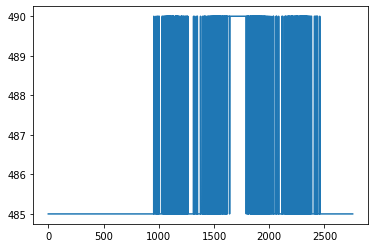

In [ ]:
plt.plot(x11,y11)
plt.show()